# Viagem do zezinho

Este trabalho tem como objetivo descrever alguns problemas que o Zezinho teve em sua viagem e a partir dos algoritmos estudados podemos ajudá-lo.

Os problemas da viagem são os seguintes:

- Achar o menor caminho para o seu destino, utilizando o algoritmo de Dijkstra;
- Guardar seus brinquedos no cofre do hotel, onde ele tem uma capacidade especifica, seus brinquedos tem tamanhos específicos e o valor sentimental de cada um deles (Knapsack - PD);
- Verificar quais são as atrações mais próximas (Par de pontos mais próximos - Greedy). 

### 1º - Menor caminho entre a fonte e seu destino

In [52]:
!pip install networkx
!pip install matplotlib
!pip install ipywidgets

import networkx as nx
from networkx.generators.random_graphs import erdos_renyi_graph


import matplotlib.pyplot as plt

import random

import ipywidgets as widgets

Vamos simular abaixo as capitais dos estados do Brasil e randomizar o peso das estradas

In [53]:
capitais = ["São Paulo","Rio de Janeiro","Belo Horizonte","Salvador","Fortaleza","Curitiba","Manaus","Recife","Belém","Porto Alegre","Goiânia","São Luís","Maceió","Campo Grande","Natal","Teresina","João Pessoa","Aracaju","Cuiabá","Florianópolis","Macapá","Porto Velho","Rio Branco","Vitória","Boa Vista","Palmas"]

O código abaixo vai gerar um grafo randomizado de Erdos Renyi simulando as estradas entre as capitais

In [54]:
n = 26
p = 0.13
g = erdos_renyi_graph(n, p, seed=123)

Agora definimos as labels de cada nó com os seus respectivos nomes

In [55]:
map_capitais = {k:v for k,v in zip(range(0,len(capitais)),capitais)}

g_capitais = nx.relabel_nodes(g,map_capitais)

Utilizando a biblioteca random, vamos definir pesos positivos entre 1 a 10 para cada aresta

In [56]:
for (u, v) in g_capitais.edges():
    g_capitais.edges[u,v]['weight'] = random.randint(0,10)

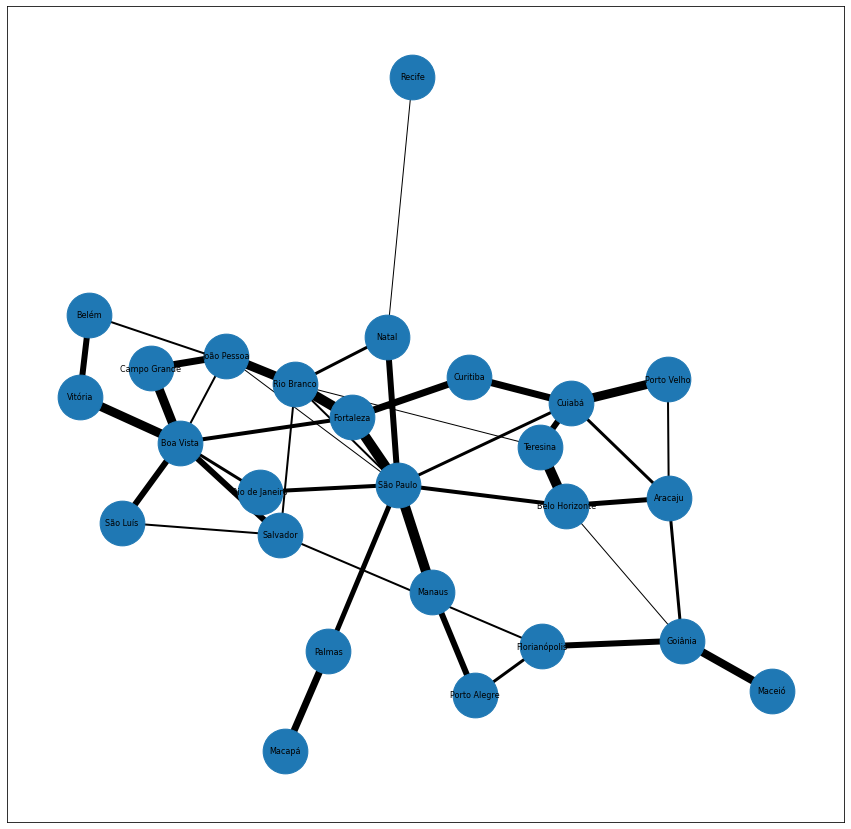

In [57]:
fig,ax = plt.subplots(figsize =(15,15))

pos = nx.spring_layout(g_capitais, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(g_capitais, pos, node_size=2000, ax=ax)

pesos = [d["weight"] for (u, v, d) in g_capitais.edges(data=True)]

#edges
nx.draw_networkx_edges(g_capitais, pos, width=pesos, ax=ax)

#labels
nx.draw_networkx_labels(g_capitais, pos, font_size=8, ax=ax)

plt.show()

In [58]:
[(v,i) for i,v in enumerate(capitais)]

[('São Paulo', 0),
 ('Rio de Janeiro', 1),
 ('Belo Horizonte', 2),
 ('Salvador', 3),
 ('Fortaleza', 4),
 ('Curitiba', 5),
 ('Manaus', 6),
 ('Recife', 7),
 ('Belém', 8),
 ('Porto Alegre', 9),
 ('Goiânia', 10),
 ('São Luís', 11),
 ('Maceió', 12),
 ('Campo Grande', 13),
 ('Natal', 14),
 ('Teresina', 15),
 ('João Pessoa', 16),
 ('Aracaju', 17),
 ('Cuiabá', 18),
 ('Florianópolis', 19),
 ('Macapá', 20),
 ('Porto Velho', 21),
 ('Rio Branco', 22),
 ('Vitória', 23),
 ('Boa Vista', 24),
 ('Palmas', 25)]

In [59]:
origem = widgets.Dropdown(
    options=[(v,i) for i,v in enumerate(capitais)],
    value=2,
    description='Origem:',
)

destino = widgets.Dropdown(
    options=[(v,i) for i,v in enumerate(capitais)],
    value=5,
    description='Destino:',
)

In [60]:
display(origem)
display(destino)

Dropdown(description='Origem:', index=2, options=(('São Paulo', 0), ('Rio de Janeiro', 1), ('Belo Horizonte', …

Dropdown(description='Destino:', index=5, options=(('São Paulo', 0), ('Rio de Janeiro', 1), ('Belo Horizonte',…

Agora, o próximo passo é utilizar o algoritmo de Dijkstra pra encontrar o menor caminho entre uma fonte e um destino.

In [61]:
def minDistance(dist,queue):

    minimum = float("Inf")
    min_index = -1

    for i in range(len(dist)):
        if dist[i] < minimum and i in queue:
            minimum = dist[i]
            min_index = i
    return min_index

In [62]:
def listaCaminho(parent, j):
    caminho = []
    while(j!=-1):
        caminho.append(map_capitais[j])
        j = parent[j]
        
    caminho.reverse()
    return caminho

In [63]:
def callback_caminho(dist, parent, src, dstny):

    h = 0
    for i in range(1, len(dist)):
        

        if i == dstny:
            h = 1
            return (listaCaminho(parent,i),dist[i])
    
    if h == 0:
        return -1,-1

In [64]:
def dijkstra(graph, src, dstny):

    row = len(graph)
    col = len(graph[0])

    dist = [float("Inf")] * row
    parent = [-1] * row
    dist[src] = 0
    queue = []

    for i in range(row):
        queue.append(i)

    while queue:

        u = minDistance(dist,queue)
        queue.remove(u)

        for i in range(col):
            if graph[u][i] and i in queue:
                if dist[u] + graph[u][i] < dist[i]:
                    dist[i] = dist[u] + graph[u][i]
                    parent[i] = u

    return callback_caminho(dist,parent, src, dstny)

Certo!

Com o algoritmo implementado, faremos a transformação do dicionário para a matriz de adjacências.

In [65]:
g_m = nx.adjacency_matrix(nx.Graph(g_capitais)).todense().tolist()

In [66]:
caminho,peso = dijkstra(g_m, origem.value, destino.value)

print(f'Peso do caminho: {peso}')
print(f'Caminho:',' -> '.join(caminho))

Peso do caminho: 14
Caminho: Belo Horizonte -> São Paulo -> Cuiabá -> Curitiba
